In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [5]:
df = pd.read_csv('Diabetes(in).csv')
df.head()

,Pragnency,Glucose,Blod Pressure,Skin Thikness,Insulin,BMI,DFP,Age,Diabetes
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [7]:
x = df[['Glucose', 'Age']]
y =df.Diabetes

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2, random_state = 7)

In [10]:
log_model = LogisticRegression()
log_model.fit(xtrain, ytrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [20]:
# glucose = 200
#age = 35
print(log_model.predict([[200, 35]]))

[1]


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [21]:
yprediction = log_model.predict(xtest)
yprediction

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [22]:
accuracy = accuracy_score(ytest, yprediction)
print(accuracy)

0.7792207792207793


In [23]:
cm = confusion_matrix(ytest, yprediction)
print(cm)

[[94 10]
 [24 26]]


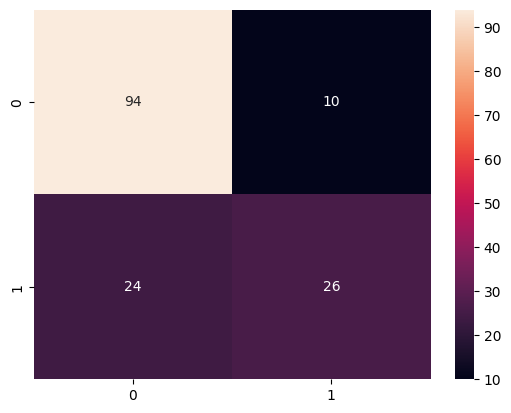

In [24]:
sns.heatmap(cm, annot = True)
plt.show()

In [25]:
count = df['Diabetes'].value_counts()
count

Diabetes
0    500
1    267
Name: count, dtype: int64

Recall = TP/(TP + FN): Hoe much of the total positive cased, model identified
FN(positive)
recall = 5/10: 50%

f1-score: 2 * P * R/(P + R)

In [27]:
precision = precision_score(ytest, yprediction)
print(f'precision= {precision:.2%}')

precision= 72.22%


this means : out of total positive prediction, 72.22% are actual positive

In [28]:
# Recall
recall = recall_score(ytest, yprediction)
print(f'Recall = {recall: .2%}')

Recall =  52.00%


Model identifid only 52% positive cases

In [29]:
# f1-score
f1_score = f1_score(ytest, yprediction)
print(f1_score)

0.6046511627906976


# Binary classification 

# Multiclass classification

In [32]:
data = sns.load_dataset('iris') # get dataset that are already in seaborn
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
sns.get_dataset_names() #all dataset available in seaborn

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [36]:
data.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [37]:
data.shape

(150, 5)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [41]:
x = data[['sepal_length','sepal_width','petal_length','petal_width']]

In [42]:
y = data.species

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.15, random_state = 90)


In [47]:
model2 = LogisticRegression(multi_class = 'multinomial')
model2.fit(xtrain, ytrain)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


In [50]:
c_m = confusion_matrix(ytest, yprediction)
print(cm)

ValueError: Found input variables with inconsistent numbers of samples: [23, 154]

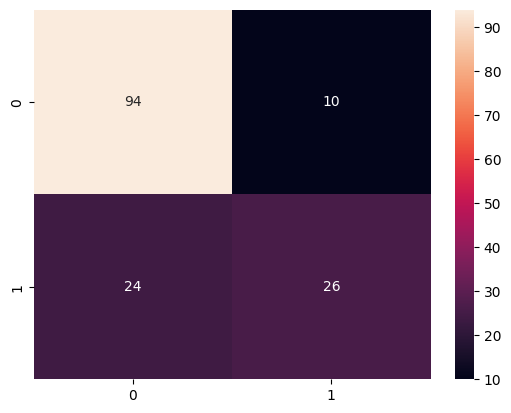

In [49]:
sns.heatmap(cm, annot = True)
plt.show()